In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import copy

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Childhood Respiratory Disease

## Description

FEV (forced expiratory volume) is an index of pulmonary function that measures the volume of air expelled after one second of constant effort. The data contains determinations of FEV on 654 children ages 6-22 who were seen in the Childhood Respiratory Desease Study in 1980 in East Boston, Massachusetts. The data are part of a larger study to follow the change in pulmonary function over time in children.

ID	 - 	ID number
Age	 - 	years
FEV	 - 	litres
Height	 - 	inches
Sex	 - 	Male or Female
Smoker	 - 	Non = nonsmoker, Current = current smoker


## Source

Tager, I. B., Weiss, S. T., Rosner, B., and Speizer, F. E. (1979). Effect of parental cigarette smoking on pulmonary function in children. American Journal of Epidemiology, 110, 15-26.
Rosner, B. (1990). Fundamentals of Biostatistics, 3rd Edition. PWS-Kent, Boston, Massachusetts.


In [2]:
# Read the csv file into a pandas DataFrame
smoking = pd.read_csv('Resources/smoking.csv')
smoking.head()

,Id,Age,FEV,Height,Sex,Smoker
0,301,9,1.708,57.0,Female,Non
1,451,8,1.724,67.5,Female,Non
2,501,7,1.720,54.5,Female,Non
3,642,9,1.558,53.0,Male,Non
4,901,9,1.895,57.0,Male,Non


In [3]:
# Use Pandas get_dummies to convert categorical data
smoking = pd.get_dummies(smoking)
smoking.head()

,Id,Age,FEV,Height,Sex_Female,Sex_Male,Smoker_Current,Smoker_Non
0,301,9,1.708,57.0,1,0,0,1
1,451,8,1.724,67.5,1,0,0,1
2,501,7,1.720,54.5,1,0,0,1
3,642,9,1.558,53.0,0,1,0,1
4,901,9,1.895,57.0,0,1,0,1


In [4]:
# Assign X (data) and y (target)
X = smoking[['Age', 'Height', 'Sex_Female', 'Sex_Male', 'Smoker_Current', 'Smoker_Non']]
y = smoking["FEV"].values.reshape(-1, 1)
print(X.shape, y.shape)

(654, 6) (654, 1)


In [5]:
# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [7]:
# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [8]:
#Computes the cost function for linear regression
def compute_cost(X, y, w, b, lambda_): 

    # number of training examples
    m, n = X.shape 
    
    # You need to return this variable correctly
    cost_sum = 0
    reg = 0
    for i in range(m):
        f_wb = np.dot(w,X[i]) + b
        cost = (f_wb - y[i])**2
        cost_sum += cost
    for j in range(n):
        reg += w[j]**2
    # Add the regularization cost to get the total cost
    total_cost = (cost/m) + (lambda_/(2 * m)) * reg

    return total_cost

In [9]:
#Computes the gradient for linear regression
def compute_gradient(X, y, w, b, lambda_): 
  
    # Number of training examples
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.
    err  = 0.

    for i in range(m):
        f_wb = np.dot(w,X[i]) + b
        
        # Calculate the  gradient for b from this example
        dj_db_i = f_wb - y[i]

        # add that to dj_db
        dj_db += dj_db_i
        
        # get dj_dw for each attribute
        for j in range (n):
            dj_dw_ij =  (f_wb - y[i])*X[i][j]
            dj_dw[j] += dj_dw_ij
            
    # divide dj_db and dj_dw by total number of examples
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    #regularization
    for j in range(n):
        dj_dw[j] = dj_dw[j] + ((lambda_*w[j])/m)
        
    return dj_dw, dj_db

In [39]:
#Performs batch gradient descent to learn theta. Updates theta by taking num_iters gradient steps with learning rate alpha
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    
    # number of training examples
    m = len(X)
    
    # An array to store cost J and w's at each iteration — primarily for graphing later
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(X, y, w, b, lambda_)  

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(X, y, w, b, lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.5f}   ")
            
    return w, b, J_history, w_history #return w and J,w history for graphing

In [46]:
# Initialize fitting parameters
np.random.seed(1)
initial_w = np.random.rand(X_train_scaled.shape[1])-0.5
initial_b = 0.5

# Set regularization parameter lambda_ to 1
lambda_ = 1                                     
# Some gradient descent settings
iterations = 500
alpha = 0.02

w,b, J_history,_ = gradient_descent(X_train_scaled, y_train_scaled, initial_w, initial_b, 
                                    compute_cost, compute_gradient, 
                                    alpha, iterations, lambda_)

Iteration    0: Cost  0.00226   
Iteration   50: Cost  0.00130   
Iteration  100: Cost  0.00121   
Iteration  150: Cost  0.00119   
Iteration  200: Cost  0.00119   
Iteration  250: Cost  0.00119   
Iteration  300: Cost  0.00119   
Iteration  350: Cost  0.00120   
Iteration  400: Cost  0.00120   
Iteration  450: Cost  0.00120   
Iteration  499: Cost  0.00120   


In [47]:
#Predict function
def predict(X, w, b): 
  
    # number of training examples
    m, n = X.shape   
    yhat = np.zeros(m)

    # Loop over each example
    for i in range(m):   
        f_wb = np.dot(w,X[i]) + b
        yhat[i]=f_wb
    return yhat

In [48]:
yhat = predict(X_test_scaled, w, b)

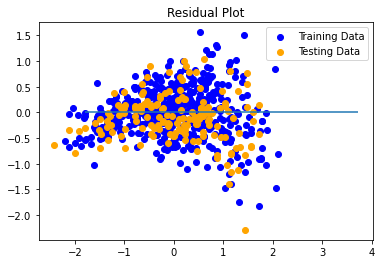

In [49]:
plt.scatter(predict(X_train_scaled, w, b), predict(X_train_scaled, w, b) - y_train_scaled[:,0], c="blue", label="Training Data")
plt.scatter(predict(X_test_scaled, w, b), predict(X_test_scaled, w, b) - y_test_scaled[:,0], c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [50]:
#Calculate the mean squared error on a data set
def eval_mse(y, yhat):
    
    m = len(y)
    err = 0.0
    for i in range(m):
        err += (y[i]-yhat[i])**2
    err = err/(2*m)
    
    return(err)

In [52]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2
MSE = eval_mse(y_test_scaled, yhat)

print(f"MSE: {MSE}")

MSE: [0.11481667]


### Normal Equation

In [53]:
def find_theta(X, y):
    
    m = X.shape[0] # Number of training examples. 
    # Appending a cloumn of ones in X to add the bias term.
    X = np.append(X, np.ones((m,1)), axis=1)    
    # reshaping y to (m,1)
    y = y.reshape(m,1)
    
    # The Normal Equation
    theta = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
    
    return theta

In [54]:
def predict(X):
    
    # Appending a cloumn of ones in X to add the bias term.
    X = np.append(X, np.ones((X.shape[0],1)), axis=1)
    
    # preds is y_hat which is the dot product of X and theta.
    preds = np.dot(X, theta)
    
    return preds

In [55]:
theta = find_theta(X_train_scaled, y_train_scaled)

In [56]:
ne_yhat = predict(X_test_scaled)

In [57]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2
MSE = eval_mse(y_test_scaled, ne_yhat)

print(f"MSE: {MSE}")

MSE: [3.38119034e+32]
